In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv("modern.csv")
df

,property_id,property_type,price,city,latitude,longitude,baths,bedrooms,Area Category,Area_Total_Marla
0,237062,0,10000000,0,33.679890,73.012640,2,2,0,4.0
1,346905,0,6900000,0,33.700993,72.971492,3,3,1,5.6
2,386513,1,16500000,0,33.631486,72.926559,6,5,1,8.0
3,656161,1,43500000,0,33.707573,73.151199,4,4,4,40.0
4,841645,1,7000000,0,33.492591,73.301339,3,3,1,8.0
...,...,...,...,...,...,...,...,...,...,...
110221,17355248,1,26500000,1,25.029909,67.137192,2,6,1,9.6
110222,17355249,1,12500000,1,25.017951,67.136393,2,3,1,8.0
110223,17355250,1,27000000,1,25.015384,67.116330,2,6,1,9.6
110224,17355251,1,11000000,1,25.013265,67.120818,2,3,1,7.8


In [16]:

# Split into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price'].astype('int')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)


In [17]:
print(f'shape of X_train {X_train.shape} & shape of y_train {y_train.shape}')
print(f'shape of X_test {X_test.shape} & shape of y_test {y_test.shape}')

shape of X_train (82669, 9) & shape of y_train (82669,)
shape of X_test (27557, 9) & shape of y_test (27557,)


In [18]:
#Feature scaling for better Performance 

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [19]:
len(df.columns)

10

In [20]:
import tensorflow as tf
from tensorflow import keras

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(11, activation="tanh", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(6, activation ="relu"),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model with the optimizer and loss function
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0019, momentum=0.04),
              loss='mean_absolute_error')

# Train the model on the training data (175 epoch good with model at accuracy of 70 plus)
history = model.fit(X_train, y_train, epochs=350, batch_size=4,validation_data=(X_test,y_test), verbose=1)

Epoch 1/350
20668/20668 [==============================] - 43s 2ms/step - loss: 10290585.0000 - val_loss: 8417290.0000
Epoch 2/350
20668/20668 [==============================] - 35s 2ms/step - loss: 8339121.5000 - val_loss: 8085344.0000
Epoch 3/350
20668/20668 [==============================] - 36s 2ms/step - loss: 8287968.0000 - val_loss: 7960381.0000
Epoch 4/350
20668/20668 [==============================] - 36s 2ms/step - loss: 8251401.0000 - val_loss: 8600507.0000
Epoch 5/350
20668/20668 [==============================] - 36s 2ms/step - loss: 8209014.0000 - val_loss: 7998702.5000
Epoch 6/350
20668/20668 [==============================] - 36s 2ms/step - loss: 8177897.5000 - val_loss: 8008066.5000
Epoch 7/350
20668/20668 [==============================] - 35s 2ms/step - loss: 8145770.5000 - val_loss: 8383724.0000
Epoch 8/350
20668/20668 [==============================] - 36s 2ms/step - loss: 8116446.0000 - val_loss: 7890251.5000
Epoch 9/350
20668/20668 [==============================

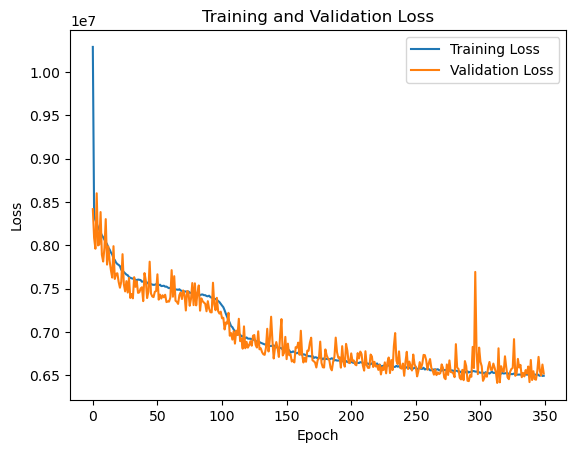

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [22]:
amn2=model.predict(X_test)

862/862 [==============================] - 1s 1ms/step


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, amn2)

0.765698635257443

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 11)                110       
                                                                 
 dense_17 (Dense)            (None, 20)                240       
                                                                 
 dense_18 (Dense)            (None, 25)                525       
                                                                 
 dense_19 (Dense)            (None, 24)                624       
                                                                 
 dense_20 (Dense)            (None, 12)                300       
                                                                 
 dense_21 (Dense)            (None, 6)                 78        
                                                                 
 dense_22 (Dense)            (None, 3)                

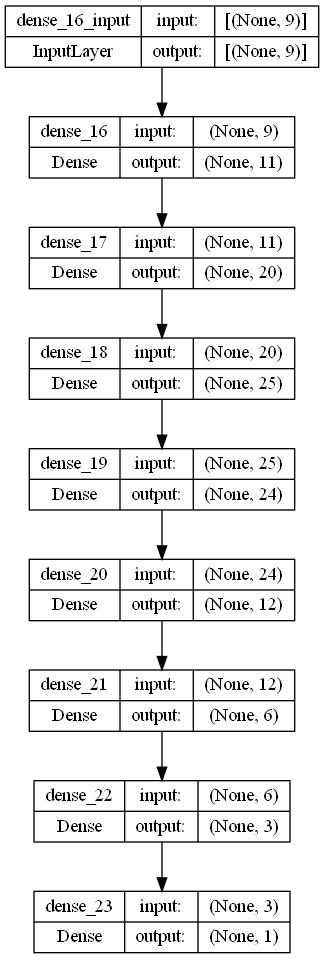

In [25]:
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

In [26]:
model.save("ann_model")

INFO:tensorflow:Assets written to: ann_model\assets


INFO:tensorflow:Assets written to: ann_model\assets


In [ ]:
model.save_weights("ann_zar_model.h5")

In [ ]:
model.summary()